## Before starting

Remember that the Jupyter notebook offers lots of tools to help you:

* use `?command` to get the documentation about a command for example `?plt.plot` 
* use TAB-completion
* use ESC+A or ESC+B to add a cell before or after the current one
* execute a cell with SHIFT+ENTER or CTRL+ENTER
* use ESC+D+D to delete a cell

# Loading the libraries

Start by loading the libraries needed. `__future__` is a way to have compatibility with Python 3 code (see also the Python warmup notebook). `introQF_library` loads the necessary libraries (`numpy`,`scipy`,`matplotlib`,..) and basic tools needed for this course, have a look later if you are interested.

In [2]:
from __future__ import division, print_function
from introQF_library import *

%matplotlib inline

In a standard fashion, the `numpy` module can now be called with `np.` and `scipy` with `sc.`

## Plotting reference

In the course, you will have to display a number of things. 

If you get stuck, remember to look at the content where more examples are available, written in full.

### Plotting curves

Let's plot $y=\sin(x)x^2$ from 0 to 3 and $y=\sin(x^2)x$ for the same range of values. 

In [0]:
# create a range of 100 values between 0 and 3
x  = np.linspace(0,3,100)
y1 = np.sin(x)*(x**2)
y2 = np.sin(x**2)*x

plt.plot(x, y1)
plt.plot(x, y2)

### Plotting histograms

For histograms, we recommend using `distplot` from `seaborn`. By default, it adds a kernel-density estimator of the probability distribution function to the histogram. If you don't want it, set `kde=False`. Also, set the option `norm_hist=True` so that it corresponds to a normalised histogram. 

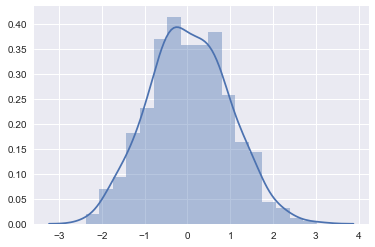

In [14]:
# draw values from a random normal
values = np.random.randn(500)

sns.distplot(values, norm_hist=True,)

# Crash Course in Probability

In the presence of a discrete set of possible outcomes and gains, computing the expected gains is easy with the `dot` function from `numpy` which takes the elementwise product of two vectors and sums those. Use it to show the expected gains in the case presented below for two consecutive coinflips and a reward depending on the outcome:

In [0]:
#outcomes:       {HH    HT    TH    TT  }
probs = np.array([1./4, 1./4, 1./4, 1./4])
gains = np.array([10  , 5   , 5   , 0   ])

# Add your code here to display the expected gains ... 


# Introduction
## Motivation

You can use the function `getPrices` below to retrieve dates and quotes from standard financial symbols. Note that this is a simple hack, more refined functions exist, for example 
`quote_historical_yahoo_ochl` from `matplotlib.finance`. In general the problem of retrieving good quality financial data is difficult all by itself depending on the granularity desired (here it's pretty crude and hence not hard to find the data).

You should try other symbols! from here: http://www.eoddata.com/symbols.aspx

The period was chosen arbitrarily to surround the 2008 crisis which you will see. Change it as you see fit!

**Notes**: the dates are converted using `matplotlib.dates` which is why if you look at the dates, you'll see a bunch of numbers. However, these can be interpreted by the `plot_date` function used later.

**NOTE (Nov 3, 2017)**: _Yahoo Finance just closed its API so the function actually does not work anymore. You can still load the CSV files corresponding to `AAPL`, `GOOG` and `AMZN` that are available for download on the public repository but if you try other symbols, you will just get an empty list._

In [4]:
aapl_d, aapl = getPrices('AAPL', 2005, 2013) 
goog_d, goog = getPrices('GOOG', 2005, 2013)

We can now display the quotes vs dates for both symbols (and by extension for any symbol you may have tried to retrieve).

Display the evolution of the prices of your symbols using `plot_date`. 

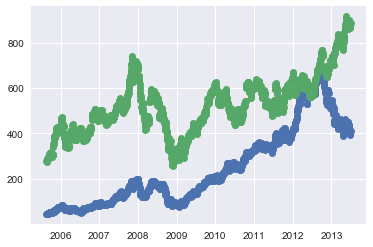

In [13]:
# Add here your code to generate the lines for the different symbols...
plt.plot_date(aapl_d, aapl)
plt.plot_date(goog_d,goog)



# Observing prices
## The log-returns

We will focus on studying and analyzing the **log-returns** which are defined as

$\log r_i = \log {S_i\over S_{i-1}}$

i.e., the logarithm of subsequent prices. Compute the log-returns for your symbols and display them. To compute the logarithms of entries of an `np.array`, you can use `np.log`, also note that `vec1/vec2` returns an elementwise division of `vec1` by `vec2` provided the two vectors have the same length.

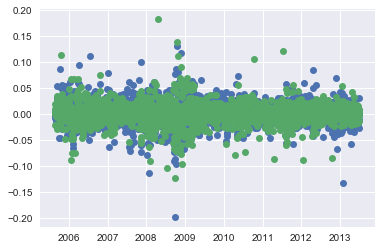

In [43]:
# Add your code here to compute the log-returns ...
aapl_r = np.log(aapl[1:]/aapl[:-1])
goog_r = np.log(goog[1:]/goog[:-1])
# And here your code to display them, note that the range of dates should be
# decreased by 1 since we are taking subsequent ratios...

plt.plot_date(aapl_d[1:],aapl_r)
plt.plot_date(goog_d[1:],goog_r)


If we model the log-returns as a random process, then you have just plotted a *realisation* of this random process. It is somewhat more informative to consider the histograms corresponding to those. 

Use `distplot` from `seaborn` to display them (set `kde=False` and `norm_hist=True`). If you want to display them side by side, use `plt.subplot`. 

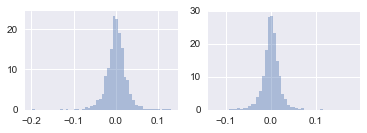

In [48]:
# Add your code here to generate the histograms...
plt.subplot(2,2,1)
sns.distplot(aapl_r, kde = False, norm_hist=True)

plt.subplot(2,2,2)
sns.distplot(goog_r, kde = False, norm_hist=True)

## Fitting a normal distribution

Those histogrammes may remind you of normal distributions, to check this, we can *fit* normal distributions to each of those histograms. 
For this, you will want to use

* `np.linspace` to build an `np.array` consisting of equally spaced entries between two points (x-values of your normal distributions)
* `norm.fit` which returns the mean and standard deviation of the best fitting normal to a series of values (the log-returns in your case)
* `norm.pdf` which computes the pdf of a parametrised normal at given values

Display the lines on top of the histogrammes, what can you observe?

**Note** don't forget `norm_hist=True`

In [49]:
# Add your code here to fit normals to the log-returns and display them.
np.linspace(aapl_r)


<function numpy.core.function_base.linspace>

## (Bonus): Fitting a Student-t distribution

The normal distribution fit is alright but not fantastic. You could try fitting another distribution such as the *Student-t* using `t.fit` and `t.pdf` and the same procedure as before.

In [0]:
# Add your code here to fit and display a Student-t distribution 


## Log-returns with different lags

So far you have looked at log-returns over subsequent prices but the notion of "subsequent" is flexible. You may want to look at log-returns over several quotes and study the evolution of the model in those conditions.

We give you an inline function which can compute the lagged log-returns for a series of prices. Can you use it to display the corresponding histogrammes for a lag of - say - 5?

**Note**: if you see a warning box, you can safely ignore it. 

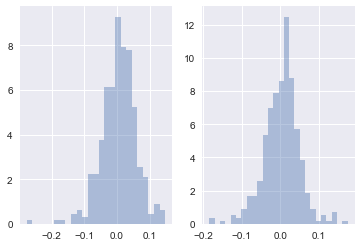

In [59]:
# inline function to compute the lagged-log returns for an arbitrary lag
llr = lambda prices, lag: np.log(prices[range(0+lag,len(prices),    lag)] / 
                                 prices[range(0,    len(prices)-lag,lag)])

# Add your code here to compute the lagged log-returns for a lag of 5
aapl_r5 = llr(aapl,5)
goog_r5 = llr(goog,5)

# Add your code here to create the histograms
x = np.linspace (-.15,15,500)

plt.subplot(1,2,1)
sns.distplot(aapl_r5,kde = False, norm_hist = True)
plt.subplot(1,2,2)
sns.distplot(goog_r5, kde = False, norm_hist = True)

# Add your code here to fit normal distributions
aapl_mean, aapl_sd = norm.fit(aapl_r5)
plt.subplot(1,2,1)
plt.plot(x,norm.pdf(x,aapl_mean, aapl_sd))

plt.subplot(1,2,2)
goog_mean, goog_sd = norm.fit(goog_r5)
plt.plot(x,norm.pdf(x, goog_mean, goog_sd))

## Evolution of the mean and variance of the lagged log-returns

Looking at those log-returns, you should have a feel for their dependence to the lag noting that, when the lag increases, the *horizontal spread increases*.

This is an important element which you should explore further. Let us compute the lagged log-returns for a number of lags and see how the mean and variance evolve. 

In [0]:
lags = np.array([1, 3, 5, 7, 10, 15, 20])
# Add your code here to compute the mean,standard deviation of the log returns
# corresponding to those lags
# Add your code here to display the evolution of the mean...

# Add your code here to display the evolution of the variance
# (squared standard deviation)


# Pricing Theory
## Not using the risk-neutral price leads to an arbitrage opportunity

In this bonus, you can show that in the case of the two games based on coin flips, if the price of the second game is not £12.3, then there is an arbitrage.

For this, show the boundary curves for 

$$ a_1 = {7\over P-6} $$

and

$$ a_2 = {-3\over P-15}$$

for a range of prices around £12.3. 

What do you observe?

In [0]:
# Add your code here to display the two boundary curves
# if you can, fill the area of possible trade points and discuss



# Derivatives
## Payoff curves for derivatives

To obtain the payoff curve of a call or put, you may need to use the `np.maximum` function which returns the elementwise maximum of two arrays but can also be used as 

```python
np.maximum(array1, 0.0)
```

which will return an array of the size of array1 with all negative entries set to `0.0`.

In [0]:
K = 100 # Strike Price
S = np.linspace(90,110,100)
# Add your code here to compute the payoff of the call and put

# Add your code here to compute the payoff of the straddle

# Add your code here to display the straddle
# (and the call and the put if you want)


# Analytic
## Black-Scholes formula

The Black-Scholes formula for the price of a call reads

$$ V^\text{call}_t = S_t \Phi(d_1) - K \exp(-r\tau) \Phi(d_2)$$

where

$$ d_{1,2} = {\log(S_t/K) + (r\pm \sigma^2/2)\tau \over \sigma \sqrt{\tau}}$$

using the functions `np.log`, `np.exp`, `np.sqrt`, `norm.cdf` (for $\Phi$) and either `**` or `np.power`, write a function `callPriceBS` taking as arguments `St,K,tau,r,v` and returning the price of the call.

In [61]:
def callPriceBS(St, K, tau, r, v):
# Add your code here...
    d1 = (np.log(St/K)+tau*(r+(v**2)/2))/(v*np.sqrt(tau))
    d2 = (np.log(St/K)+tau*(r-(v**2)/2))/(v*np.sqrt(tau))
    
    return St*norm.cdf(d1)-K*np.exp(-r*tau)*norm.cdf(d2)
    

Test that your code works, the following line should return approximately `17.4`.

In [62]:
print("{0:.4f}".format(callPriceBS(105, 100, 2, 0.05, 0.15)))

17.4542


# (Bonus) Computing the greeks

Below we show how one can compute the Delta both analytically and numerically.

In [0]:
def callDeltaBS(St, K, tau, r, v):
    d1 = ( (np.log(St/K)) + (r+np.power(v, 2)/2)*tau ) / (v*np.sqrt(tau))
    return norm.cdf(d1)

def callDeltaNumerical(St, K, tau, r, v): 
    deltaS = St/1000
    Vplus  = callPriceBS(St+deltaS, K, tau, r, v)
    V      = callPriceBS(St, K, tau, r, v)
    return (Vplus-V)/deltaS

You can test the differences and see that the numerical approximation is perfectly acceptable

In [0]:
dAnalytical = callDeltaBS(60, 75, 2, 0.05, 0.1)
dNumerical  = callDeltaNumerical(60, 75, 2, 0.05, 0.1)
pctDiff     = np.abs(dAnalytical-dNumerical)/dAnalytical*100

print("Delta (Analytical): {0:.5f}".format(dAnalytical))
print("Delta (Numerical) : {0:.5f}".format(dNumerical))
print("Percentage diff   : {0:.1f}".format(pctDiff))

Let's plot the evolution of the Delta as a function of the price of the underlying when

* $K=75$
* $\tau = 2$
* $r=0.05$
* $v=0.1$

And when the price of the underlying varies from $40$ to $105$ (use the `np.linspace` function).


In [0]:
# Add your code here


Can you do the same with the Vega, Theta, ...

In [0]:
# Add your code here to compute the Vega


In [0]:
# Add your code here to display the Vega


In [0]:
# Add your code here to compute the Theta


In [0]:
# Add your code here to display the Theta


# The Volatility smile

The file `aapl_smile.csv` contains 

* Bid and Ask for calls over a range of possible strikes
* The corresponding implied volatilities

Open it using 
```python
data = read_csv("aapl_smile.csv")
```

the elements can be read with

* `data.STRIKE`
* `data.CBID`, `data.CASK` (call bid & ask)
* `data.PBID`, `data.PASK` (put bid and ask)
* `data.CBIDIV`, `data.CASKIV` (implied vol for the call)
* `data.PBIDIV`, `data.PASKIV` (implied vol for the put)

Plot all of this with respect to the strike (keep the implied vol on another graph). What can you observe?


In [0]:
# Read the data, plot the put,call bid and ask.



In [0]:
# Plot the put,call bid and ask implied vol



# The binomial tree

Compute the number of paths leading to each node of the last layer of an N-step binomial tree, use `comb` to compute

$$ {N!\over k!(N-k)!} $$

if $N=4$, you should get `[1.0, 4.0, 6.0, 4.0, 1.0]`


In [64]:
#note: there are N+1 final nodes when considering N steps
#add cour code here...
nPaths = lambda N: [comb(N,k) for k in range(0, N+1)]
nPaths(5)    

[1.0, 5.0, 10.0, 10.0, 5.0, 1.0]

## Observing the convergence to a LogNormal distribution

1. following the previous code, write functions returning the end probabilities and the end returns
2. display the probabilities associated with the returns, does the shape look familiar?

In [0]:
# Add your code for functions returning the probabilities & returns 
def probability(p, N):
    return [comb(N,k)*(p**k)*((1-p)**N-k) for k in range (0, N+1)]

def price(d, u, N):
    return [comb(N,k)*u**k*d**(N-k) for k in range (0, N+1)]
# corresponding to the last layer
# enter some arbitrary values
p = 0.6  # probability of going up
u = 1.03 # multiplicative "up factor"
d = 0.99 # multiplicative "down factor"

# number of steps (play with this number)
N = 100
# Add your code here to compute the returns/probabilities using your functions...
# Add your code here to  display probabilities vs returns


Provided you have done the previous step successfully and defined a vector `returns` and `probas`, the following cell should show you how well the log-returns match a normal distribution. Don't pay attention too much to the re-scaling which is there to compare everything on a single scale.

In [0]:
from numpy import trapz

logreturns = np.log(returns)

# the theory gives us the mean and variance
# at the limit when N goes to infinity
# the last line is to "normalize" so that the curves and
# the points are on the same scale 
# (you can safely ignore all this)
th_mean = N*(p*np.log(u)+(1-p)*np.log(d))
th_var  = N*p*(1-p)*np.log(d/u)**2
pr_norm  = probas / abs(trapz(logreturns,probas))

# show the possible log-returns with their weights
plt.scatter(logreturns, pr_norm, label="Log returns")

# show the normal distribution with the theoretical mean and variance
# computed above
xx = np.linspace(np.min(logreturns),np.max(logreturns),100)
yy = norm.pdf(xx,th_mean,np.sqrt(th_var))

plt.plot(xx, yy, label="Normal fit", color="orange")

plt.legend()

## Pricing in a BT? easy!

Write a code that reproduces each of the step of the pricing in a BT. 

Start by doing it step by step and check that you can get something like this result:

```
Forward
100
[  99.  102.]
[  98.01  100.98  104.04]
Backward
[ 0.    1.98  5.04]
[ 0.66  3.  ]
1.44
```

can you now make it into a function?


In [0]:
# EUROPEAN CALL
S0 = 100
K  = 99
u  = 1.02
d  = 0.99
# Add your code here...
S1 = S0 * np.array([u, d])
S2 = S0 * np.array([u**2, u*d, d**2])

   
